<a href="https://colab.research.google.com/github/rizwannitk/machinelearning/blob/main/PROPHET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings
!pip install fbprophet
import fbprophet

In [3]:



data = pd.read_csv("/content/sample_data/GOOG.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-09,1197.989990,1203.880005,1183.603027,1188.010010,1188.010010,1065700
1,2019-08-12,1179.209961,1184.959961,1167.671997,1174.709961,1174.709961,1003000
2,2019-08-13,1171.459961,1204.780029,1171.459961,1197.270020,1197.270020,1294400
3,2019-08-14,1176.310059,1182.300049,1160.540039,1164.290039,1164.290039,1578700
4,2019-08-15,1163.500000,1175.839966,1162.109985,1167.260010,1167.260010,1218700


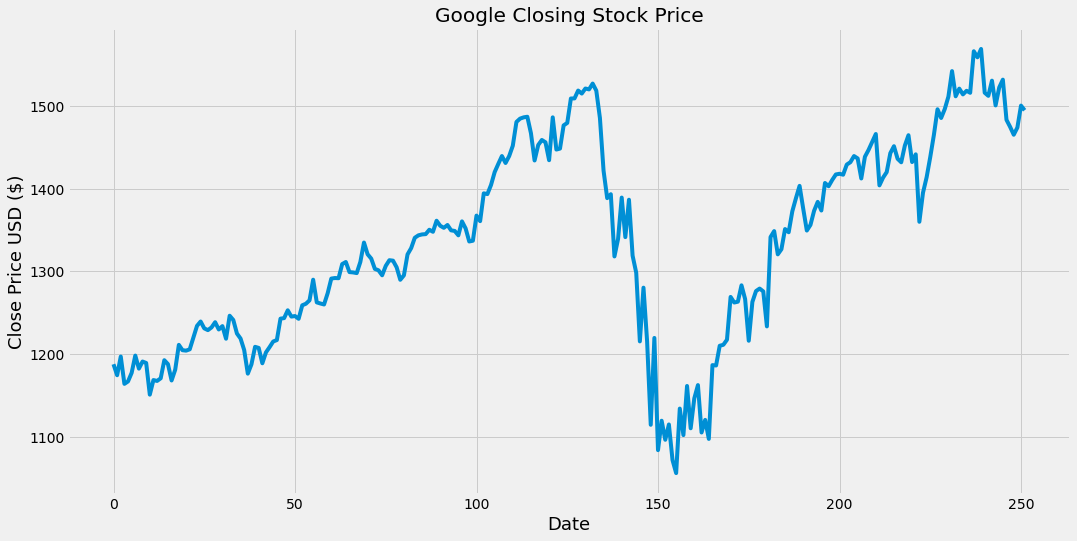

In [4]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Google Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [5]:
data = data[["Date","Close"]] 
data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2019-08-09,1188.010010
1,2019-08-12,1174.709961
2,2019-08-13,1197.270020
3,2019-08-14,1164.290039
4,2019-08-15,1167.260010


In [6]:
from fbprophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


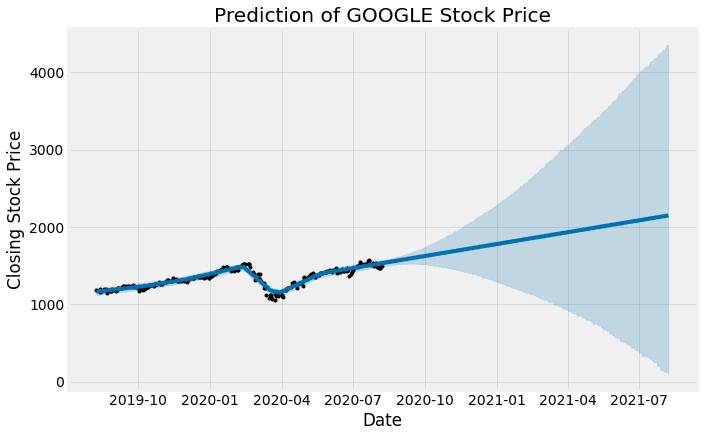

In [7]:
future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

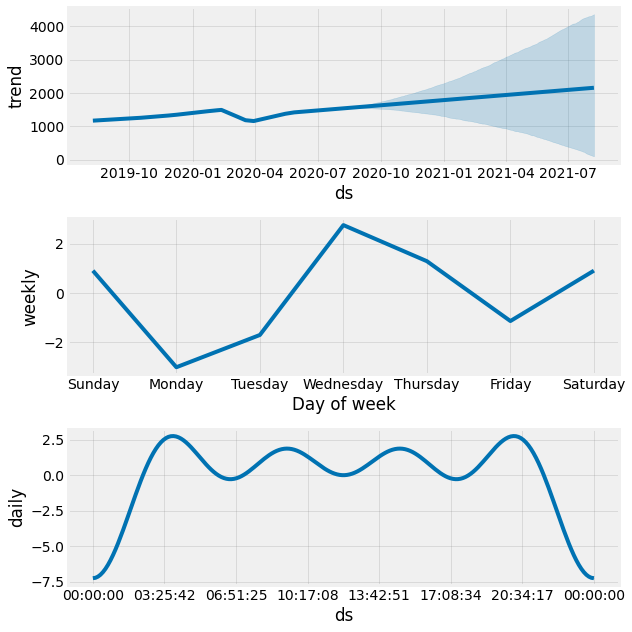

In [8]:
m.plot_components(predictions)
plt.show()